# 기본 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

## 데이터 불러오기

In [2]:
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,...,campaign_count,pdays,pcampaign_count,pcampaign_result,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

In [3]:
bank.shape

(41188, 21)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   job               41188 non-null  object 
 2   married           41188 non-null  object 
 3   edu               41188 non-null  object 
 4   default           41188 non-null  object 
 5   home_loan         41188 non-null  object 
 6   personal_loan     41188 non-null  object 
 7   contact           41188 non-null  object 
 8   month             41188 non-null  object 
 9   day               41188 non-null  object 
 10  duration          41188 non-null  int64  
 11  campaign_count    41188 non-null  int64  
 12  pdays             41188 non-null  int64  
 13  pcampaign_count   41188 non-null  int64  
 14  pcampaign_result  41188 non-null  object 
 15  emp_var_rate      41188 non-null  float64
 16  cons_price_idx    41188 non-null  float6

## 라벨값 변화 및 추출

In [5]:
bank = bank.drop("y", axis=1)

## 기술통계량

In [6]:
bank.describe(include="all")

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,duration,campaign_count,pdays,pcampaign_count,pcampaign_result,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000


## 상관관계

In [7]:
 bank.corr()

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign_count,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
pcampaign_count,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor_3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:>

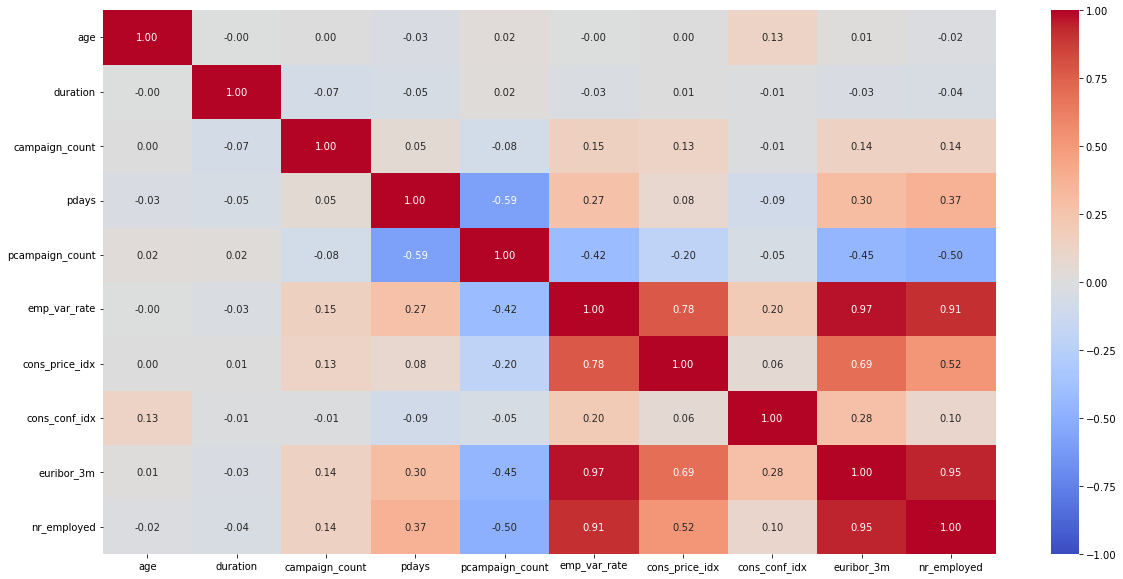

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(bank.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, center= 0, cmap='coolwarm')

## 변수별 개수

In [9]:
for i in range(len(bank.columns)):
    print("value_count(): \n", bank[bank.columns[i]].value_counts())
    print("unique() : ", bank[bank.columns[i]].unique(), "\n")

value_count(): 
 31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
unique() :  [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 

value_count(): 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
unique() :  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

value_count(): 
 married     24928
single      11568
divorced     4612
unknown        80
Nam

## 명목형, 연속형 나누기

In [10]:
bank_int = bank.loc[:, ['age', 'duration', 'campaign_count', 'pdays', 'pcampaign_count']]
bank_int_name = [var for var in bank.columns if bank[var].dtype == "i8"]

bank_float = bank.loc[:, ['emp_var_rate', 'cons_price_idx', 'euribor_3m', 'nr_employed']]
bank_float_name = [var for var in bank.columns if bank[var].dtype == "f8"]

bank_object = bank.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]
bank_object_name = [var for var in bank.columns if bank[var].dtype == "O"]

## 차트 그리는 함수

### int형 countplot

In [11]:
def countplot_int(data):
    plt.figure(figsize=(20, 10))

    plt.subplot(2, 2, 1)
    sns.countplot(x = data['age']//10, data=data)

    plt.subplot(2, 2, 2)
    sns.countplot(x = data['duration']//60, data=data)

    plt.subplot(2, 2, 3)
    sns.countplot(x = data['campaign_count'], data=data)

    plt.subplot(2, 2, 4)
    sns.countplot(x = data['pcampaign_count'], data=data)

    plt.tight_layout()
    plt.show()

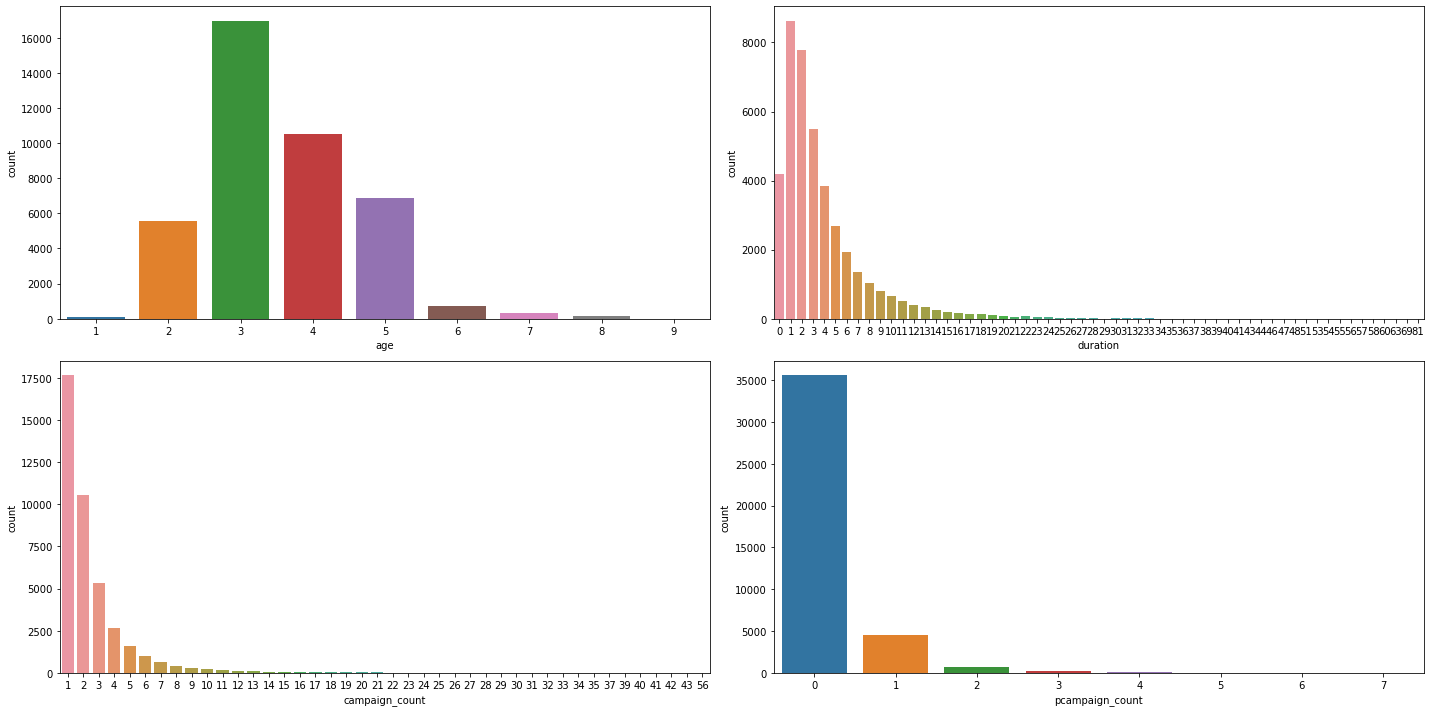

In [12]:
countplot_int(bank_int)

### int형 boxplot

In [13]:
def boxplot_int(data):
    cnt=0
    for i in data:
        sns.boxplot(y = data[i].unique(), data = data)
        plt.title(data.columns[cnt])
        cnt+=1
        plt.show()
        print('\n')

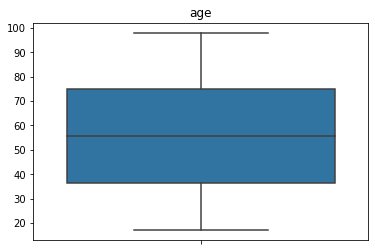

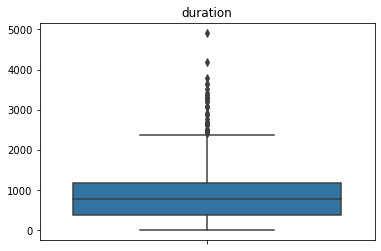

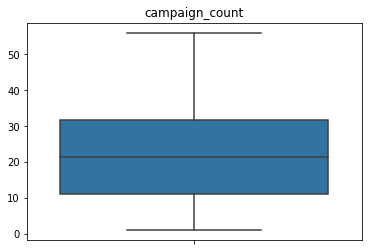

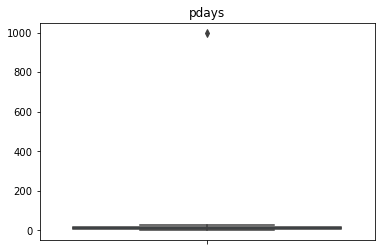

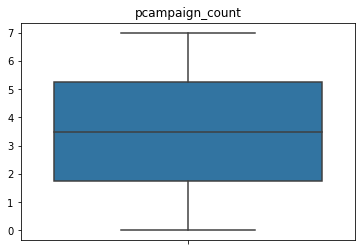

In [14]:
boxplot_int(bank_int)

### float형 boxplot

In [15]:
#float형 boxplot
def boxplot_float(data):
    cnt=0
    for i in data:
        sns.boxplot(y = data[i].unique(), data = data)
        plt.title(data.columns[cnt])
        cnt+=1
        plt.show()
        print('\n')

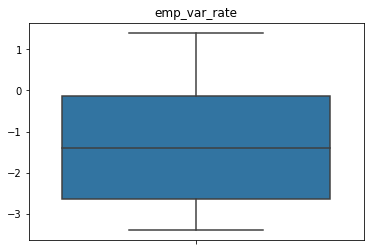

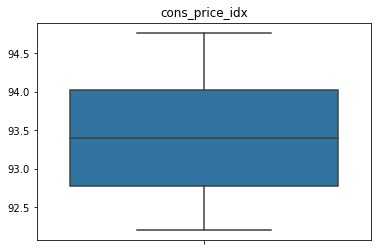

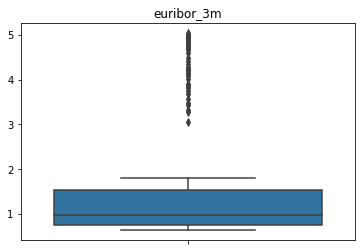

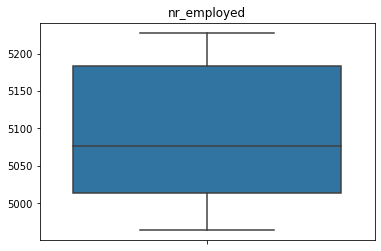

In [16]:
boxplot_float(bank_float)

### 범주형 pieplot

In [17]:
def pie(data):
    count=0
    for i in data:
        fig = plt.figure(figsize=(13, 13))
        ax = fig.add_subplot()
        pie = ax.pie(x = data[i].value_counts(), autopct='%.1f%%')
        plt.title(data.columns[count],fontsize=30)
        plt.legend(pie[0],labels = data[i].unique(), loc='upper left')
        plt.show()
        count+=1
        print('\n')

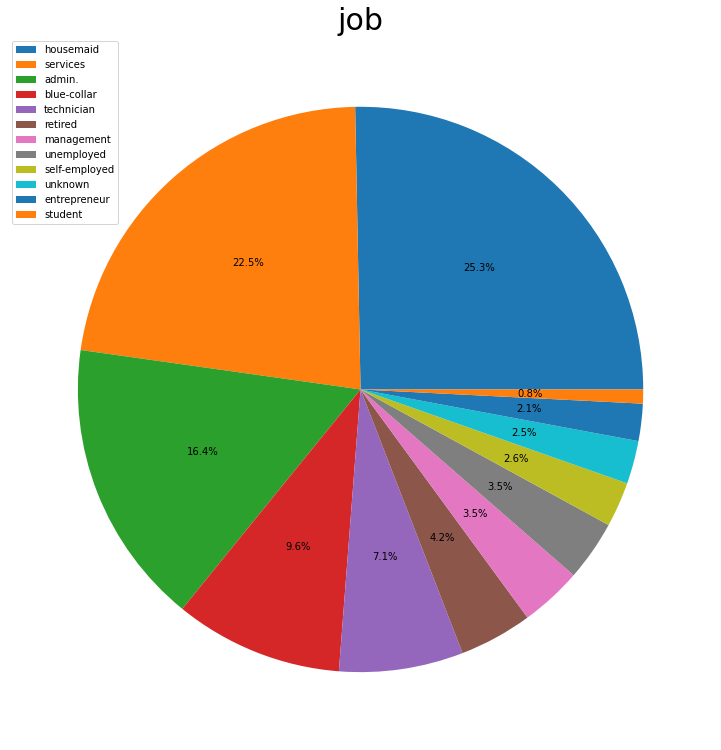

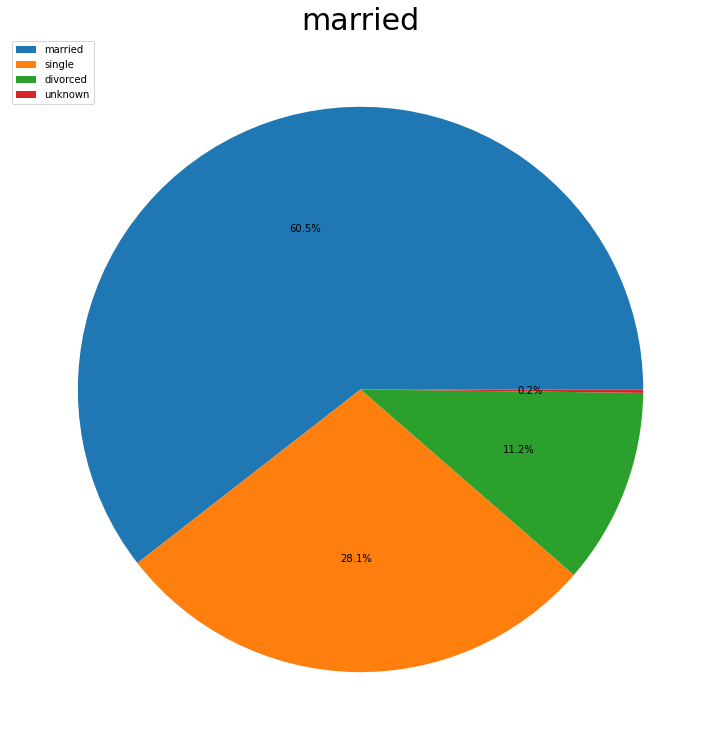

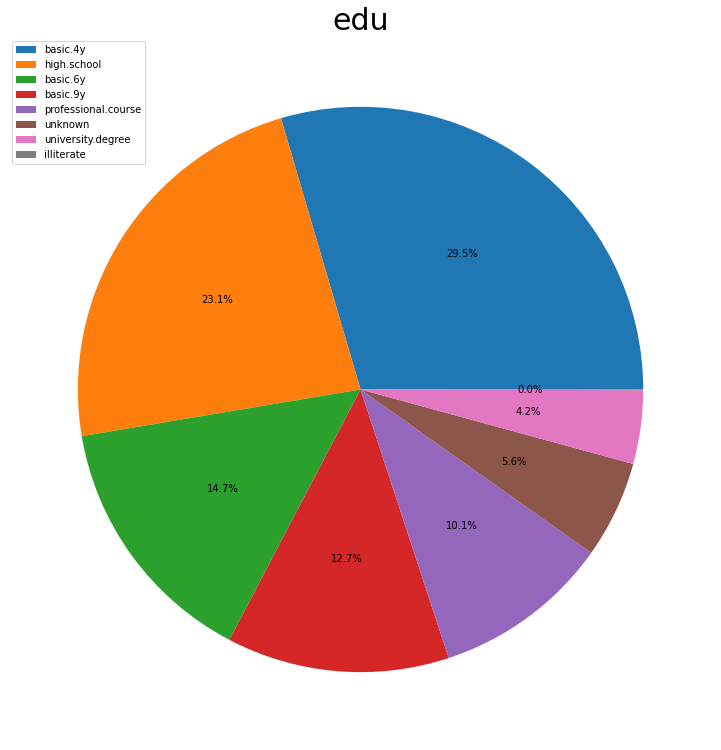

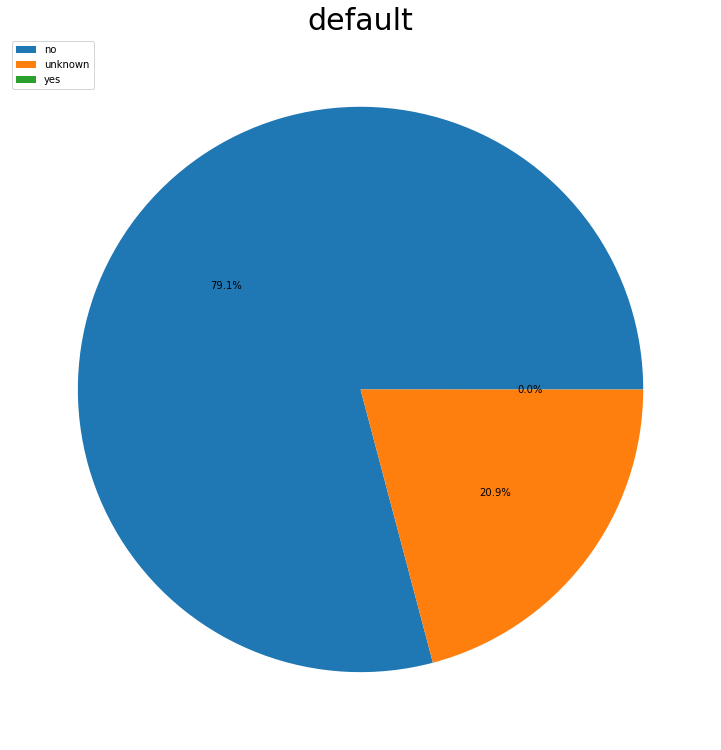

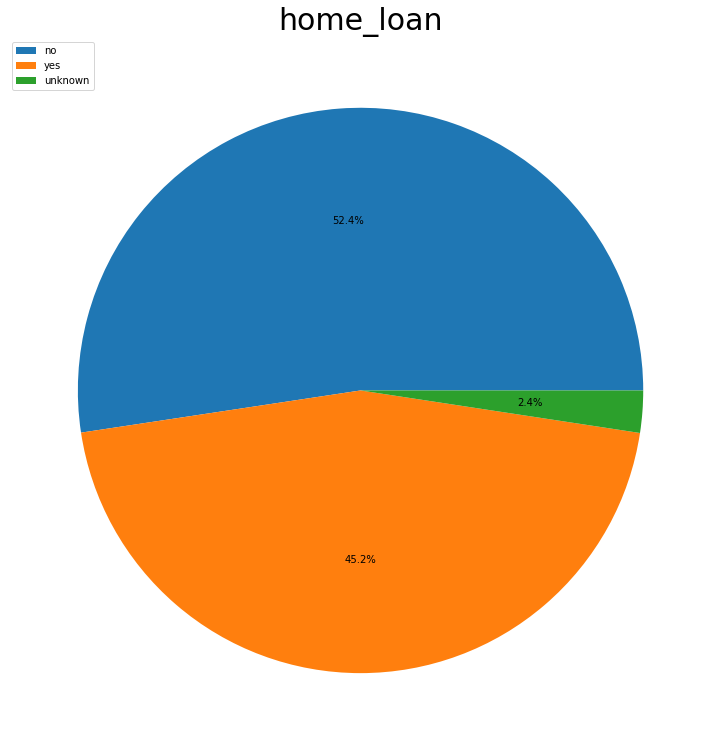

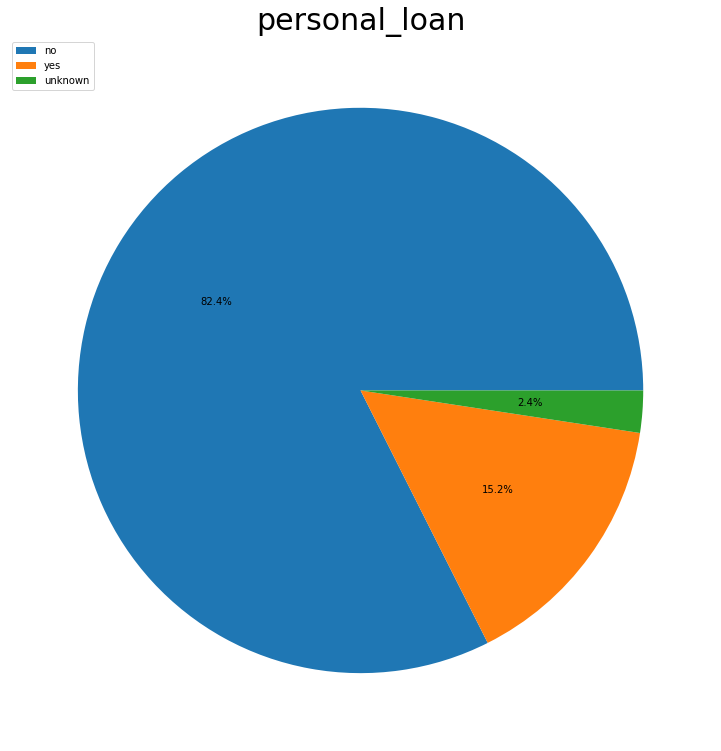

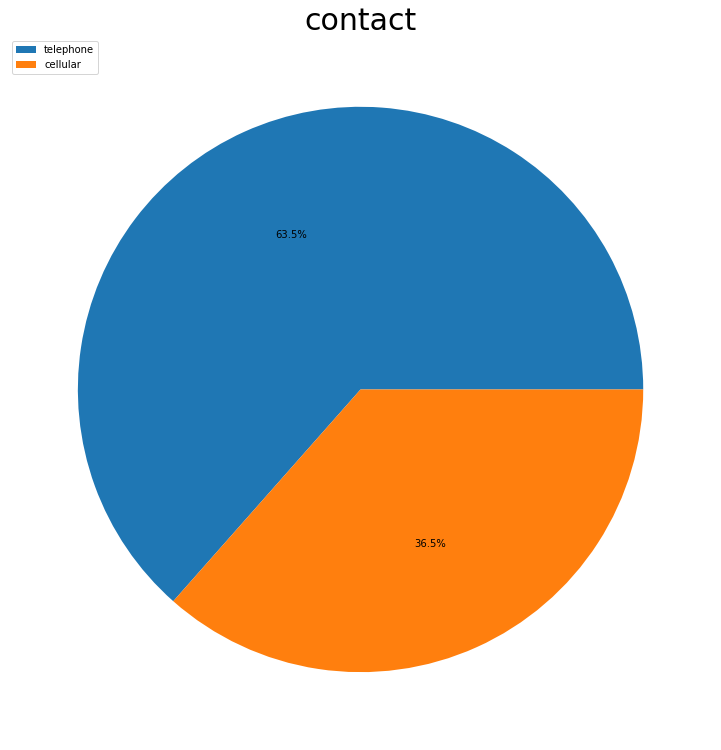

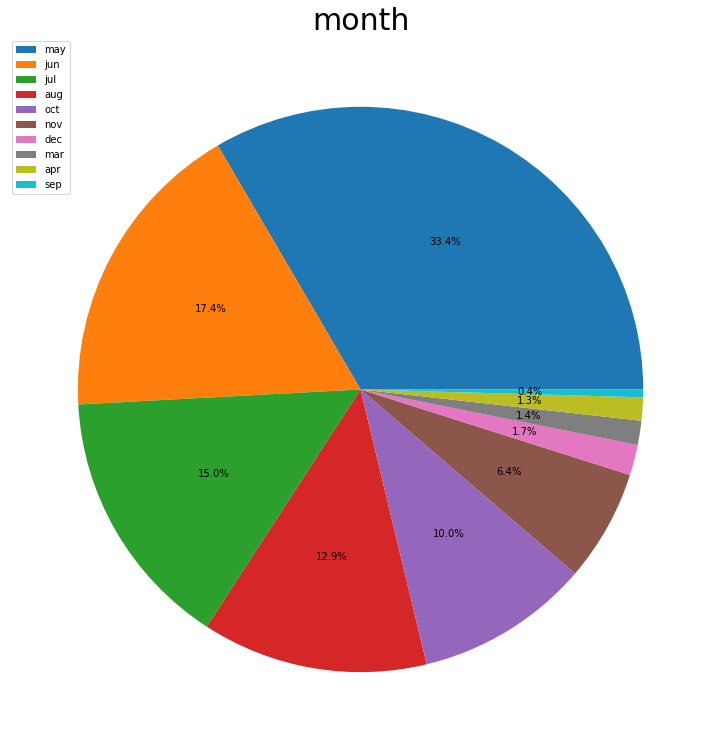

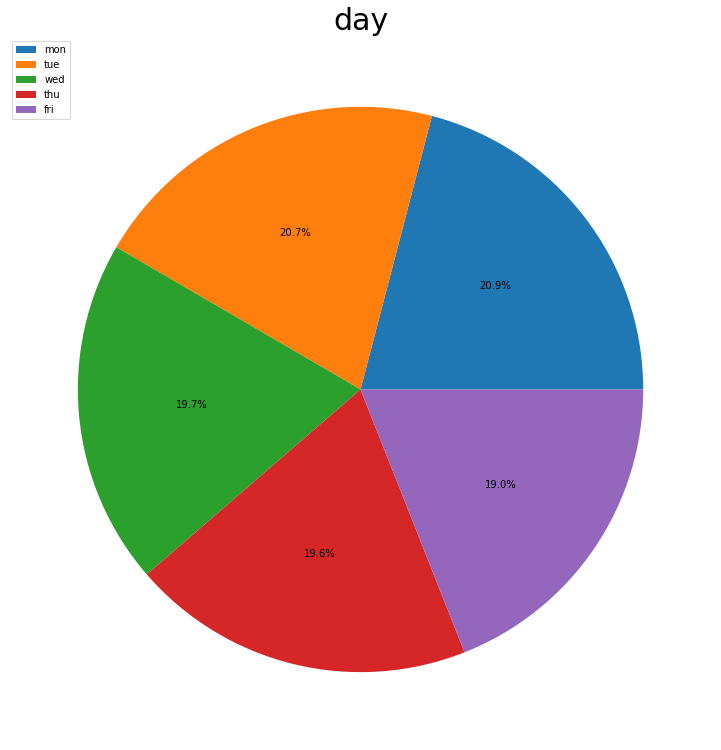

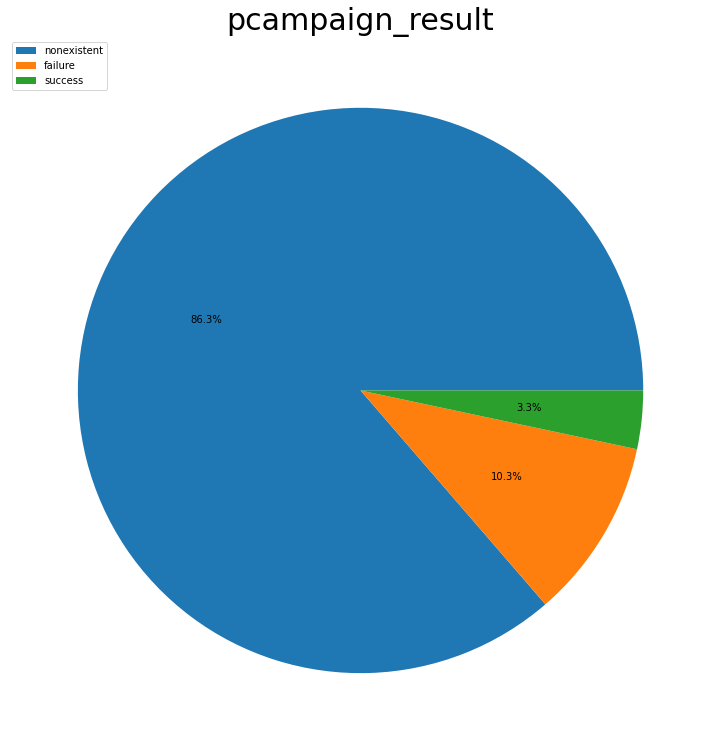

In [18]:
pie(bank_object)

### y변수와의 관계

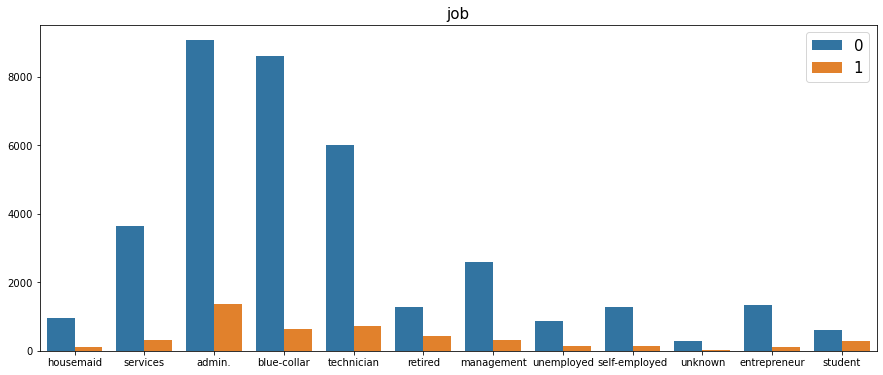

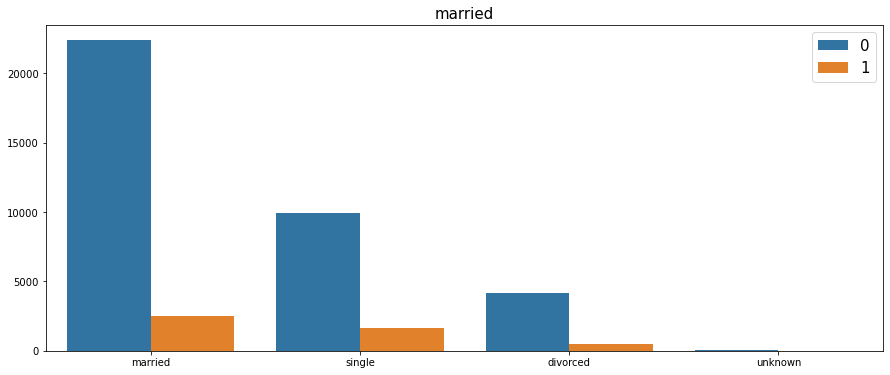

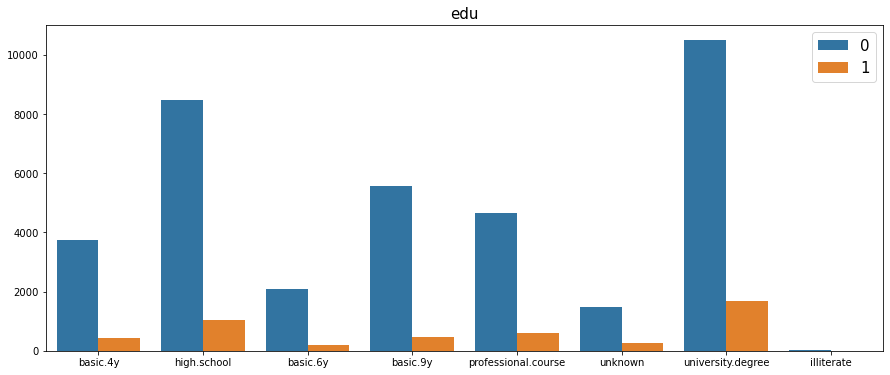

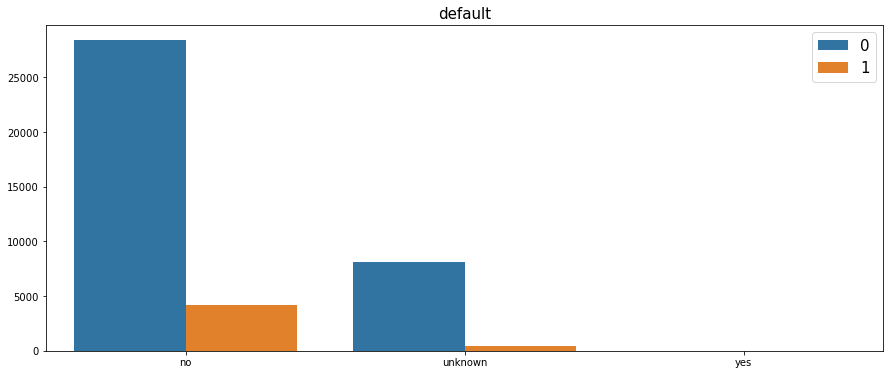

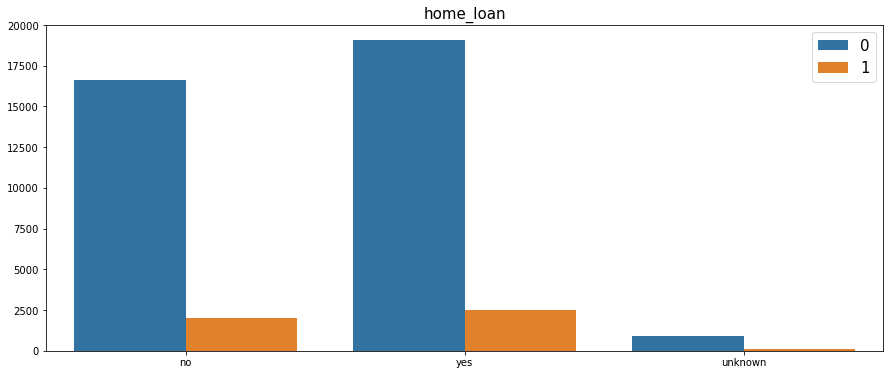

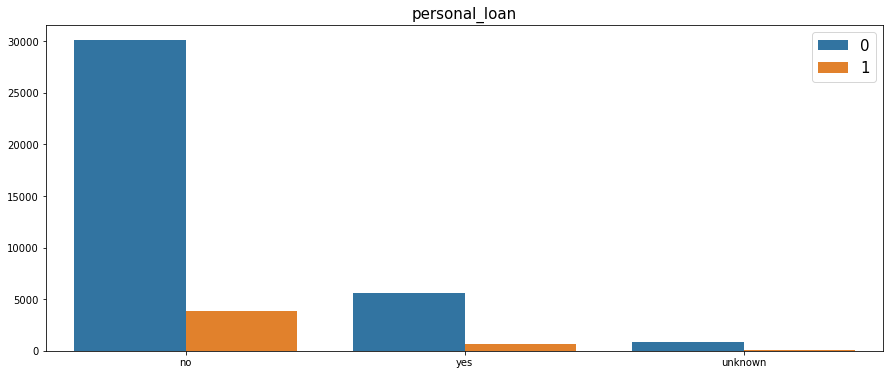

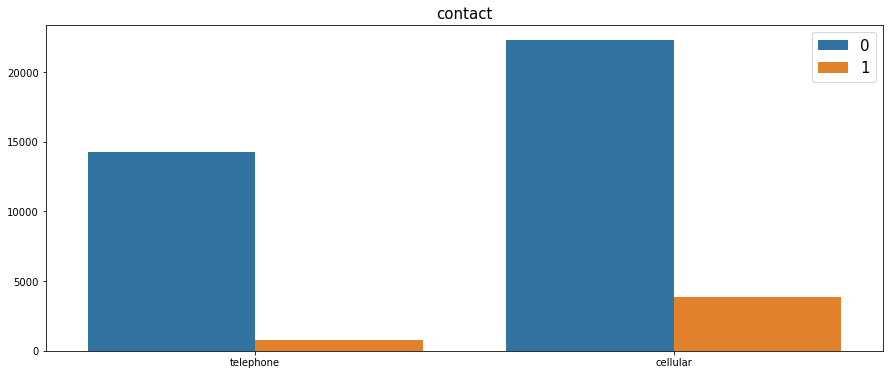

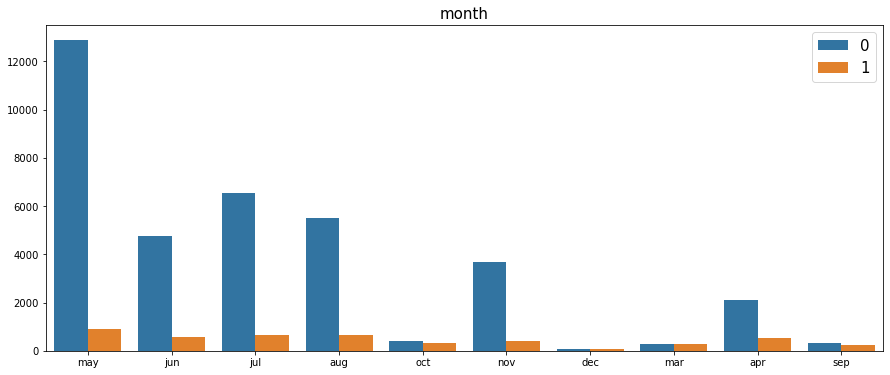

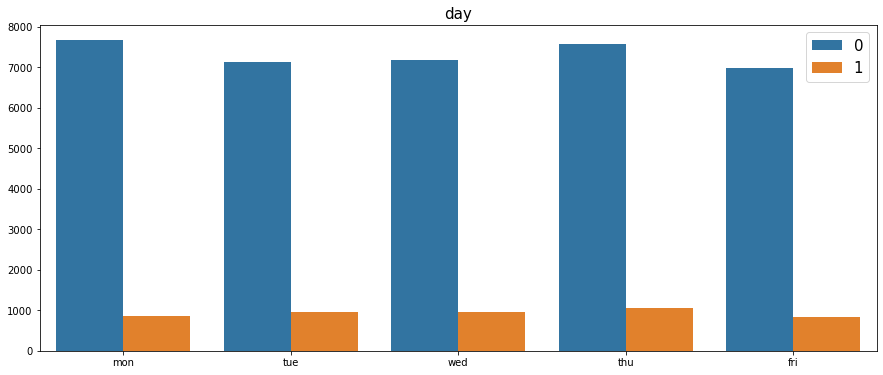

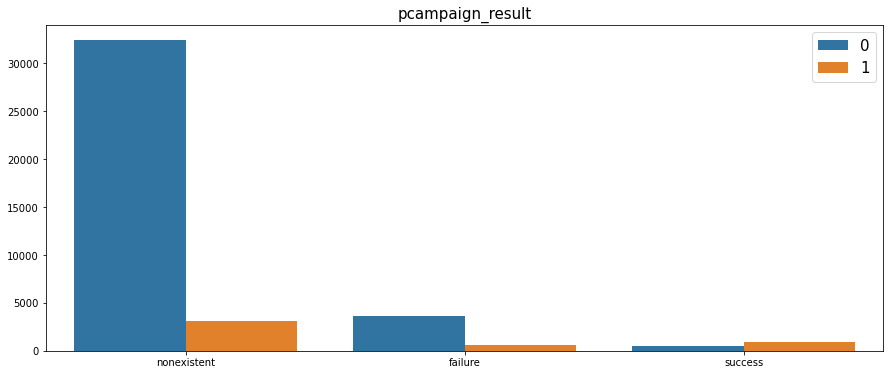

In [21]:
for column in bank_object:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=bank[column], hue=bay)
    plt.legend(loc='upper right',fontsize=15)
    plt.title(column,fontsize=15)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

## 결측치 분포 확인

In [22]:
bank.isnull().sum()

age                 0
job                 0
married             0
edu                 0
default             0
home_loan           0
personal_loan       0
contact             0
month               0
day                 0
duration            0
campaign_count      0
pdays               0
pcampaign_count     0
pcampaign_result    0
emp_var_rate        0
cons_price_idx      0
cons_conf_idx       0
euribor_3m          0
nr_employed         0
dtype: int64

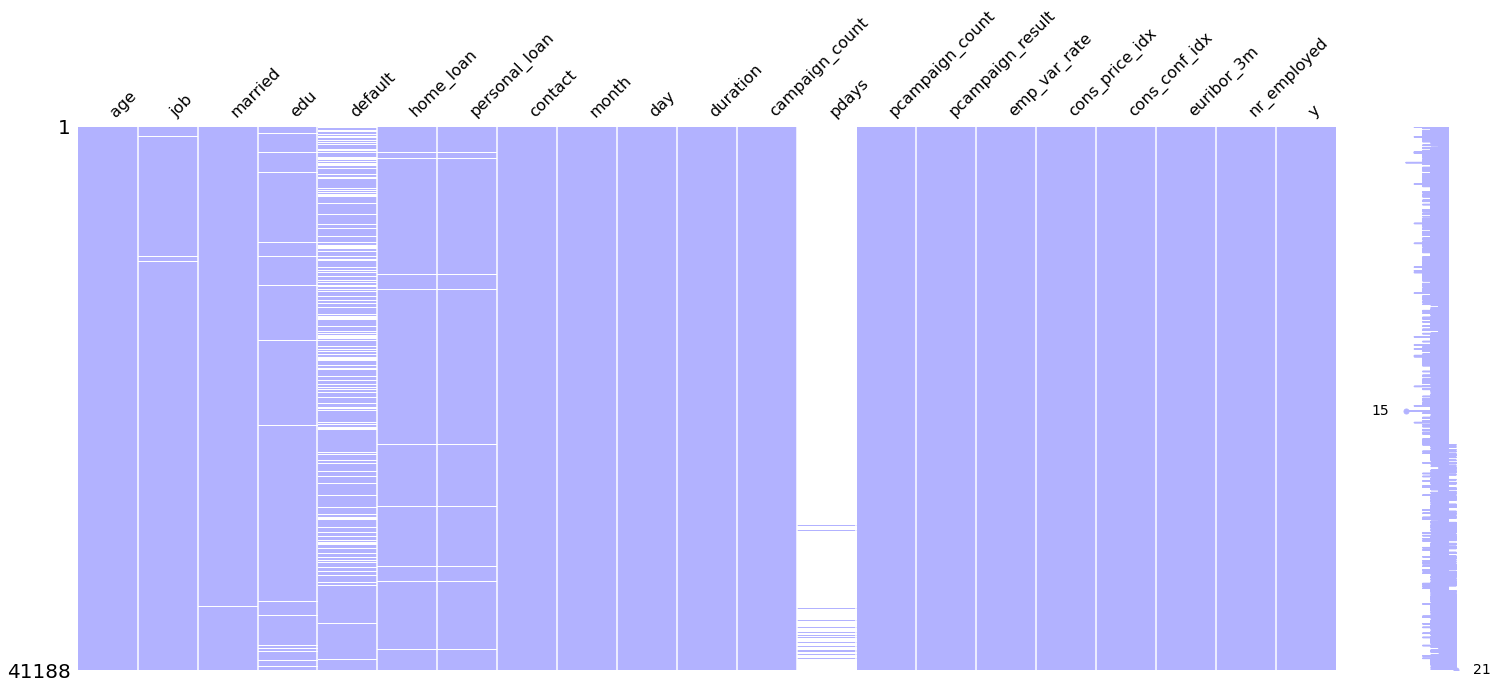

In [192]:
bank.replace('unknown', np.NaN, inplace=True)
bank.replace(999, np.NaN, inplace=True)

# 결측치 분포 확인하기
import missingno
missingno.matrix(bank, color=(0.7, 0.7, 1.0))
plt.show()

In [23]:
# 값 라벨로 지정하는 함수
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}%".format(y_value/total*100)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)


ax = sns.countplot(x = bank['y'])  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()

KeyError: 'y'

# feature engineering

## 표준화

In [24]:
def minmax(data,columns):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    return scaler.fit_transform(data[columns])

def standard(data,columns):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    return scaler.fit_transform(data[columns])

def abs(data,columns):
    from sklearn.preprocessing import MaxAbsScaler
    scaler = MaxAbsScaler()
    return scaler.fit_transform(data[columns])

## 인코딩

In [25]:
# 레이블 인코딩 함수
def label(bank_object):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    for i in bank_object:
        bank_object[i] = labelencoder_X.fit_transform(bank_object[i])
    return bank_object

# 원-핫 인코딩
def onehot(bank_object):
    return pd.get_dummies(bank_object)

## 데이터프레임으로 합치기

In [33]:
# categorical 형식 추출 함수
categorical = bank.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = numerical = [x for x in bank.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

### Standard + Label

In [34]:
bank_standard = standard(bank,numerical)
bank_standard = pd.DataFrame(bank_standard, columns=numerical)
bank_label = label(categorical)
standard_label = pd.concat([bank_standard, bank_label], axis=1)
standard_label

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,3,1,0,0,0,0,1,6,1,1
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,7,1,3,1,0,0,1,6,1,1
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,7,1,3,0,2,0,1,6,1,1
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,1,1,0,0,0,1,6,1,1
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,5,1,5,0,2,0,0,7,0,1
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,1,5,0,0,0,0,7,0,1
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,5,1,6,0,2,0,0,7,0,1
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,9,1,5,0,0,0,0,7,0,1


### Standard + Onehot

In [35]:
bank_standard = standard(bank,numerical)
bank_standard = pd.DataFrame(bank_standard, columns=numerical)
bank_onehot = onehot(categorical)
standard_onehot = pd.concat([bank_standard, bank_onehot], axis=1)
standard_onehot

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,3,1,0,0,0,0,1,6,1,1
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,7,1,3,1,0,0,1,6,1,1
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,7,1,3,0,2,0,1,6,1,1
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0,1,1,0,0,0,1,6,1,1
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,5,1,5,0,2,0,0,7,0,1
41184,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1,1,5,0,0,0,0,7,0,1
41185,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,5,1,6,0,2,0,0,7,0,1
41186,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,9,1,5,0,0,0,0,7,0,1


### MinMax + Label

In [36]:
bank_minmax = minmax(bank,numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_label = label(categorical)
minmax_label = pd.concat([bank_minmax, bank_label], axis=1)
minmax_label

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,5,0,2,0,0,7,0,1
41184,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1,1,5,0,0,0,0,7,0,1
41185,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,6,0,2,0,0,7,0,1
41186,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,9,1,5,0,0,0,0,7,0,1


### MinMax + Onehot

In [37]:
bank_minmax = minmax(bank,numerical)
bank_minmax = pd.DataFrame(bank_minmax, columns=numerical)
bank_onehot = onehot(categorical)
minmax_onehot = pd.concat([bank_minmax, bank_onehot], axis=1)
minmax_onehot

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,3,1,0,0,0,0,1,6,1,1
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,1,0,0,1,6,1,1
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,2,0,1,6,1,1
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,1,1,0,0,0,1,6,1,1
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,5,0,2,0,0,7,0,1
41184,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1,1,5,0,0,0,0,7,0,1
41185,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5,1,6,0,2,0,0,7,0,1
41186,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,9,1,5,0,0,0,0,7,0,1


### Abs + Label

In [38]:
bank_abs = abs(bank,numerical)
bank_abs = pd.DataFrame(bank_abs, columns=numerical)
bank_label = label(categorical)
abs_label = pd.concat([bank_abs, bank_label], axis=1)
abs_label

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.571429,0.053070,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,3,1,0,0,0,0,1,6,1,1
1,0.581633,0.030297,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,7,1,3,1,0,0,1,6,1,1
2,0.377551,0.045954,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,7,1,3,0,2,0,1,6,1,1
3,0.408163,0.030704,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1,1,0,0,0,1,6,1,1
4,0.571429,0.062424,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.744898,0.067914,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,5,1,5,0,2,0,0,7,0,1
41184,0.469388,0.077877,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,1,1,5,0,0,0,0,7,0,1
41185,0.571429,0.038430,0.035714,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,5,1,6,0,2,0,0,7,0,1
41186,0.448980,0.089874,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,9,1,5,0,0,0,0,7,0,1


### Abs + Onehot

In [39]:
bank_abs = abs(bank,numerical)
bank_abs = pd.DataFrame(bank_abs, columns=numerical)
bank_onehot = onehot(categorical)
abs_onehot = pd.concat([bank_abs, bank_onehot], axis=1)
abs_onehot

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,0.571429,0.053070,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,3,1,0,0,0,0,1,6,1,1
1,0.581633,0.030297,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,7,1,3,1,0,0,1,6,1,1
2,0.377551,0.045954,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,7,1,3,0,2,0,1,6,1,1
3,0.408163,0.030704,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,1,1,0,0,0,1,6,1,1
4,0.571429,0.062424,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.744898,0.067914,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,5,1,5,0,2,0,0,7,0,1
41184,0.469388,0.077877,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,1,1,5,0,0,0,0,7,0,1
41185,0.571429,0.038430,0.035714,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,5,1,6,0,2,0,0,7,0,1
41186,0.448980,0.089874,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,9,1,5,0,0,0,0,7,0,1


## 라벨값 변환 및 추출

In [ ]:
y = bank.replace({"no":0, "yes":1})
y = y.iloc[:, -1]

# modeling

##  model import

In [40]:
from sklearn.tree import DecisionTreeClassifier                                       # 의사결정나무
from sklearn.naive_bayes import GaussianNB                                            # 나이브 베이즈
from sklearn.neighbors import KNeighborsClassifier                                    # K-최근접 이웃
from sklearn.linear_model import Perceptron                                           # 퍼셉트론
from sklearn.linear_model import LogisticRegression                                   # 로지스틱 회귀 모델
from sklearn.svm import SVC                                                           # 서포트 벡터 머신(SVM)
from sklearn.neural_network import MLPClassifier                                      # 인공신경망(ANN)
# from sklearn.ensemble import VotingClassifier                                        # 보팅
from sklearn.ensemble import BaggingClassifier                                        # 배깅
from sklearn.ensemble import AdaBoostClassifier                                       # 부스팅
from sklearn.ensemble import GradientBoostingClassifier                               # 그래디언트 부스트
from sklearn.ensemble import RandomForestClassifier                                   # 랜덤포레스트
from xgboost import XGBClassifier                                                     # XGBoost
from lightgbm import LGBMClassifier                                                   # LightGBM
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis               # 이차판별분석(QDA)
from sklearn.multiclass import OneVsOneClassifier                                     # OVO
from sklearn.multiclass import OneVsRestClassifier                                    # OVR

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_label, y, stratify=y, random_state=29)

In [43]:
def modeling(X_train,X_test,y_train,y_test):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    dt = DecisionTreeClassifier(max_depth=5)
    nb = GaussianNB()
    knn = KNeighborsClassifier()
    pc = Perceptron()
    lr = LogisticRegression()
    svc = SVC()
    mlp = MLPClassifier()
    bag = BaggingClassifier()
    ada = AdaBoostClassifier()
    rf = RandomForestClassifier(max_depth=5)
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    lgbm = LGBMClassifier()
    qda = QuadraticDiscriminantAnalysis()
    
    model = [dt, nb, knn, pc, lr, svc, mlp, bag, ada, rf, gb, xgb, lgbm, qda]
    model_name = ["dt", "nb", "knn", "pc", "lr", "svc", "mlp", "bag", "ada", "rf", "gb", "xgb", "lgbm", "qda"]
    scores = []
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for i in model:
        i.fit(X_train, y_train)
        y_pred = i.predict(X_test)
        scores.append(i.score(X_test, y_test))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    return pd.DataFrame(data={"model":model_name, "score":scores, "accuracy":accuracy_scores, 
                              "precision":precision_scores, "recall":recall_scores, 
                              "f1":f1_scores}).sort_values("f1", ascending=False)

In [44]:
modeling(X_train,X_test,y_train,y_test)

[20:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,score,accuracy,precision,recall,f1
12,lgbm,0.918326,0.918326,0.655005,0.581034,0.615806
11,xgb,0.915218,0.915218,0.640824,0.562931,0.599358
10,gb,0.917646,0.917646,0.666667,0.537931,0.595420
0,dt,0.913858,0.913858,0.632911,0.560345,0.594422
7,bag,0.907643,0.907643,0.612245,0.491379,0.545194
13,qda,0.876566,0.876566,0.463891,0.614655,0.528736
6,mlp,0.911431,0.911431,0.666220,0.428448,0.521511
3,pc,0.902787,0.902787,0.591274,0.443966,0.507139
8,ada,0.909585,0.909585,0.661041,0.405172,0.502405
4,lr,0.910556,0.910556,0.684699,0.381897,0.490315


## 모델링

In [53]:
modeling(minmax_onehot, y)

KeyboardInterrupt: 

In [ ]:
modeling(abs_label, y)

In [ ]:
modeling(abs_onehot, y)

## 하이퍼파라미터 탐색

In [47]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standard_label, y, stratify=y, random_state=29)

def gs_logistic(X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    logi = LogisticRegression()
    param_grid=dict(max_iter=[100, 200, 300],
                   C=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    grid_search = GridSearchCV(logi, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_logistic(X_train, y_train):
    from sklearn.linear_model import LogisticRegression
    logi = LogisticRegression()
    param_grid=dict(max_iter=[100, 200, 300],
                   C=[0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    grid_search = GridSearchCV(logi, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_decision(X_train, y_train):
    from sklearn.tree import DecisionTreeClassifier
    decision = DecisionTreeClassifier()
    param_grid = dict(max_depth=[6, 7, 8, 9, 10])
    grid_search = GridSearchCV(decision, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_perceptron(X_train,y_train):
    from sklearn.linear_model import Perceptron 
    pc=Perceptron()
    param_grid=dict(penalty=["l1"])
    grid_search=GridSearchCV(pc, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_svc(X_train,y_train):
    from sklearn.svm import SVC
    svc=SVC()
    param_grid=dict(C=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2], gamma=[0.01, 1, 5])
    grid_search=GridSearchCV(svc, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_ovo(X_train,y_train):
    from sklearn.multiclass import OneVsOneClassifier
    ovo=OneVsOneClassifier()
    param_grid=dict(estimator=["LogisticRegression"])
    grid_search=GridSearchCV(ovo, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_ovr(X_train,y_train):
    from sklearn.multiclass import OneVsRestClassifier
    ovr=OneVsRestClassifier()
    param_grid=dict(estimator=["LogisticRegression"])
    grid_search=GridSearchCV(ovr, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_mlp(X_train, y_train):
    from sklearn.neural_network import MLPClassifier
    mlp = MLPClassifier()
    param_grid = dict(hidden_layer_sizes=[100, 200], activation=['tanh'])
    grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

def gs_baggingclassifier(X_train,y_train):
    from sklearn.ensemble import BaggingClassifier
    bg=BaggingClassifier()
    param_grid=dict(n_estimators=[10,50,100,150], max_features=['auto',2,3,4])
    grid_search=GridSearchCV(bg, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_randomforest(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    rf=RandomForestClassifier()
    param_grid=dict(n_estimators=[100,200,300],
                   max_depth=['None',5,6,7],
                   max_features=['auto','sqrt'])
    grid_search=GridSearchCV(rf, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_adaboostclassifier(X_train,y_train):
    from sklearn.ensemble import AdaBoostClassifier
    ad=AdaBoostClassifier()
    param_grid=dict(n_estimators=[50,300,400,500,600])
    grid_search=GridSearchCV(ad, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_gradientboostingclassifier(X_train,y_train):
    from sklearn.ensemble import GradientBoostingClassifier
    gb=GradientBoostingClassifier()
    param_grid=dict(n_estimators=[100,300,400,500,600],
                   max_depth=[3,5,6,7],
                   max_features=['None','auto'])
    grid_search=GridSearchCV(gb, param_grid=param_grid,cv=5,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_xgclassifier(X_train,y_train):
    from xgboost import XGBClassifier
    xg=XGBClassifier()
    param_grid=dict(n_estimators=[100,300,400,500,600],
                   max_depth=[3,4,5,6],
                   gamma=[0,0.1,0.2,0.3,0.4,0.5])
    grid_search=GridSearchCV(xg, param_grid=param_grid,cv=2,verbose=10)
    grid_search.fit(X_train,y_train)
    return grid_search

def gs_lgbm(X_train,y_train):
    from lightgbm import LGBMClassifier    
    from sklearn.model_selection import GridSearchCV
    lgbm = LGBMClassifier()
    param_grid = dict(n_estimators=[100, 500, 600, 700], boosting_type=["rf", "gbdt"],
                   max_depth=[-1,5,6,7], gamma=[0, 0.1, 0.2, 0.3, 0.4, 0.5])
    grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5, verbose=10)
    grid_search.fit(X_train, y_train)
    return grid_search

# 추가 제안

## pdays 제거

In [299]:
bank_pdays_cut = bank.drop("pdays", axis=1)

In [300]:
bank_pdays_cut

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,duration,campaign_count,pcampaign_count,pcampaign_result,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [301]:
# categorical 형식 추출 함수
categorical = bank_pdays_cut.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [var for var in bank_pdays_cut.columns if bank_pdays_cut[var].dtype!="O"]

### Abs + Onehot

In [302]:
bank_abs = abs(numerical)
bank_abs = pd.DataFrame(bank_abs, columns=numerical)

In [303]:
bank_onehot = onehot(categorical)

In [304]:
abs_onehot = pd.concat([bank_abs, bank_onehot], axis=1)
abs_onehot

,age,duration,campaign_count,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job_admin.,...,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,pcampaign_result_failure,pcampaign_result_nonexistent,pcampaign_result_success
0,0.571429,0.053070,0.017857,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,...,0,0,0,1,0,0,0,0,1,0
1,0.581633,0.030297,0.017857,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,...,0,0,0,1,0,0,0,0,1,0
2,0.377551,0.045954,0.017857,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,...,0,0,0,1,0,0,0,0,1,0
3,0.408163,0.030704,0.017857,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,1,...,0,0,0,1,0,0,0,0,1,0
4,0.571429,0.062424,0.017857,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.744898,0.067914,0.017857,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,...,0,0,1,0,0,0,0,0,1,0
41184,0.469388,0.077877,0.017857,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,...,0,0,1,0,0,0,0,0,1,0
41185,0.571429,0.038430,0.035714,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,...,0,0,1,0,0,0,0,0,1,0
41186,0.448980,0.089874,0.017857,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,...,0,0,1,0,0,0,0,0,1,0


### 모델링

In [307]:
modeling(abs_onehot, y)

[14:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,score,accuracy,precision,recall,f1
10,gb,0.917743,0.917743,0.665608,0.542241,0.597625
12,lgbm,0.915995,0.915995,0.645320,0.564655,0.602299
0,dt,0.914441,0.914441,0.637710,0.556897,0.594570
11,xgb,0.912207,0.912207,0.627490,0.543103,0.582255
8,ada,0.909391,0.909391,0.654843,0.413793,0.507132
4,lr,0.908808,0.908808,0.671318,0.373276,0.479778
7,bag,0.907157,0.907157,0.606918,0.499138,0.547777
6,mlp,0.904244,0.904244,0.602594,0.440517,0.508964
9,rf,0.900262,0.900262,0.809302,0.150000,0.253091
5,svc,0.898320,0.898320,0.679365,0.184483,0.290169


## duration 제거

In [315]:
bank_duration_cut = bank.drop("duration", axis=1)

In [316]:
bank_duration_cut

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,campaign_count,pdays,pcampaign_count,pcampaign_result,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [317]:
# categorical 형식 추출 함수
categorical = bank_duration_cut.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [var for var in bank_duration_cut.columns if bank_duration_cut[var].dtype!="O"]

### Abs + Onehot

In [318]:
bank_abs = abs(numerical)
bank_abs = pd.DataFrame(bank_abs, columns=numerical)

In [319]:
bank_onehot = onehot(categorical)

In [320]:
abs_onehot = pd.concat([bank_abs, bank_onehot], axis=1)
abs_onehot

,age,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,job_admin.,...,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,pcampaign_result_failure,pcampaign_result_nonexistent,pcampaign_result_success
0,0.571429,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,...,0,0,0,1,0,0,0,0,1,0
1,0.581633,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,...,0,0,0,1,0,0,0,0,1,0
2,0.377551,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,...,0,0,0,1,0,0,0,0,1,0
3,0.408163,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,1,...,0,0,0,1,0,0,0,0,1,0
4,0.571429,0.017857,1.0,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.744898,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,...,0,0,1,0,0,0,0,0,1,0
41184,0.469388,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,...,0,0,1,0,0,0,0,0,1,0
41185,0.571429,0.035714,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,...,0,0,1,0,0,0,0,0,1,0
41186,0.448980,0.017857,1.0,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,0,...,0,0,1,0,0,0,0,0,1,0


### 모델링

In [321]:
modeling(abs_onehot, y)

[15:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,score,accuracy,precision,recall,f1
12,lgbm,0.900456,0.900456,0.653759,0.247414,0.358974
0,dt,0.900165,0.900165,0.641026,0.258621,0.368550
10,gb,0.899291,0.899291,0.660574,0.218103,0.327933
4,lr,0.898805,0.898805,0.666667,0.203448,0.311757
8,ada,0.898805,0.898805,0.663889,0.206034,0.314474
9,rf,0.897737,0.897737,0.691756,0.166379,0.268242
11,xgb,0.897252,0.897252,0.598077,0.268103,0.370238
5,svc,0.896572,0.896572,0.643505,0.183621,0.285714
2,knn,0.890842,0.890842,0.536437,0.228448,0.320435
6,mlp,0.889774,0.889774,0.518519,0.301724,0.381471


## 결측치 처리

In [100]:
bank = pd.read_csv('bank.csv')
y = bank.replace({"no":0, "yes":1})
y = y.iloc[:, -1]
bank = bank.drop("y", axis=1)

In [101]:
bank.replace('unknown',float('nan'),inplace=True)
bank.replace(999,float('nan'), inplace=True)

In [102]:
bank.isnull().sum()

age                     0
job                   330
married                80
edu                  1731
default              8597
home_loan             990
personal_loan         990
contact                 0
month                   0
day                     0
duration                2
campaign_count          0
pdays               39673
pcampaign_count         0
pcampaign_result        0
emp_var_rate            0
cons_price_idx          0
cons_conf_idx           0
euribor_3m              0
nr_employed             0
dtype: int64

In [103]:
from sklearn.impute import SimpleImputer

In [104]:
bank_mostfreq=SimpleImputer(strategy='most_frequent')

In [105]:
bank_1=bank_mostfreq.fit_transform(bank)
bank_pd=pd.DataFrame(bank_1,columns=bank.columns)
bank_pd.head()

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,duration,campaign_count,pdays,pcampaign_count,pcampaign_result,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,3.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,no,telephone,may,mon,149.0,1,3.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,3.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,3.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,3.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [115]:
bank_pd.mode()

,age,job,married,edu,default,home_loan,personal_loan,contact,month,day,duration,campaign_count,pdays,pcampaign_count,pcampaign_result,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed
0,31,admin.,married,university.degree,no,yes,no,cellular,may,thu,85.0,1,3.0,0,nonexistent,1.4,93.994,-36.4,4.857,5228.1


In [107]:
bank_pd.isnull().sum()

age                 0
job                 0
married             0
edu                 0
default             0
home_loan           0
personal_loan       0
contact             0
month               0
day                 0
duration            0
campaign_count      0
pdays               0
pcampaign_count     0
pcampaign_result    0
emp_var_rate        0
cons_price_idx      0
cons_conf_idx       0
euribor_3m          0
nr_employed         0
dtype: int64

In [108]:
len(bank_pd.columns)

20

In [123]:
# categorical 형식 추출 함수
categorical = bank_pd.loc[:, ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

# numerical 형식 추출 함수
numerical = [x for x in bank_pd.columns if x not in ['job', 'married', 'edu', 'default', 'home_loan', 'personal_loan', 'contact', 'month', 'day', 'pcampaign_result']]

In [124]:
bank.columns

Index(['age', 'job', 'married', 'edu', 'default', 'home_loan', 'personal_loan',
       'contact', 'month', 'day', 'duration', 'campaign_count', 'pdays',
       'pcampaign_count', 'pcampaign_result', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor_3m', 'nr_employed'],
      dtype='object')

In [125]:
categorical.head()

,job,married,edu,default,home_loan,personal_loan,contact,month,day,pcampaign_result
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [126]:
bank_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               41188 non-null  object
 1   job               41188 non-null  object
 2   married           41188 non-null  object
 3   edu               41188 non-null  object
 4   default           41188 non-null  object
 5   home_loan         41188 non-null  object
 6   personal_loan     41188 non-null  object
 7   contact           41188 non-null  object
 8   month             41188 non-null  object
 9   day               41188 non-null  object
 10  duration          41188 non-null  object
 11  campaign_count    41188 non-null  object
 12  pdays             41188 non-null  object
 13  pcampaign_count   41188 non-null  object
 14  pcampaign_result  41188 non-null  object
 15  emp_var_rate      41188 non-null  object
 16  cons_price_idx    41188 non-null  object
 17  cons_conf_id

In [131]:
numerical

['age',
 'duration',
 'campaign_count',
 'pdays',
 'pcampaign_count',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor_3m',
 'nr_employed']

In [134]:
len(numerical),len(categorical.columns)

(10, 10)

In [135]:
def abs(data):
    from sklearn.preprocessing import MaxAbsScaler
    scaler = MaxAbsScaler()
    return scaler.fit_transform(bank_pd[data])

In [136]:
bank_abs = abs(numerical)
bank_abs = pd.DataFrame(bank_abs, columns=numerical)

bank_onehot = onehot(categorical)

abs_onehot = pd.concat([bank_abs, bank_onehot], axis=1)
abs_onehot

,age,duration,campaign_count,pdays,pcampaign_count,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,...,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,pcampaign_result_failure,pcampaign_result_nonexistent,pcampaign_result_success
0,0.571429,0.053070,0.017857,0.111111,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,...,0,0,0,1,0,0,0,0,1,0
1,0.581633,0.030297,0.017857,0.111111,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,...,0,0,0,1,0,0,0,0,1,0
2,0.377551,0.045954,0.017857,0.111111,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,...,0,0,0,1,0,0,0,0,1,0
3,0.408163,0.030704,0.017857,0.111111,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,...,0,0,0,1,0,0,0,0,1,0
4,0.571429,0.062424,0.017857,0.111111,0.000000,0.323529,0.991843,-0.716535,0.962735,0.992904,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.744898,0.067914,0.017857,0.111111,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,...,0,0,1,0,0,0,0,0,1,0
41184,0.469388,0.077877,0.017857,0.111111,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,...,0,0,1,0,0,0,0,0,1,0
41185,0.571429,0.038430,0.035714,0.111111,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,...,0,0,1,0,0,0,0,0,1,0
41186,0.448980,0.089874,0.017857,0.111111,0.000000,-0.323529,1.000000,-1.000000,0.203766,0.949408,...,0,0,1,0,0,0,0,0,1,0


In [137]:
modeling(abs_onehot, y)

[19:16:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,score,accuracy,precision,recall,f1
10,gb,0.917937,0.917937,0.667375,0.541379,0.597811
12,lgbm,0.915606,0.915606,0.646526,0.553448,0.596377
0,dt,0.913470,0.913470,0.630964,0.558621,0.592593
11,xgb,0.912984,0.912984,0.629921,0.551724,0.588235
7,bag,0.909294,0.909294,0.628118,0.477586,0.542605
8,ada,0.909294,0.909294,0.652703,0.416379,0.508421
4,lr,0.908711,0.908711,0.671340,0.371552,0.478357
6,mlp,0.901525,0.901525,0.561551,0.574138,0.567775
9,rf,0.900942,0.900942,0.775591,0.169828,0.278642
5,svc,0.898708,0.898708,0.686901,0.185345,0.291921
